In [68]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import random
import zipfile

In [69]:
zf = zipfile.ZipFile('titanic.zip')

In [70]:
df_test = pd.read_csv(zf.open('test.csv'))
df_train = pd.read_csv(zf.open('train.csv'))


df_train.drop(columns=['Age'], inplace=True)
df_test.drop(columns=['Age'], inplace=True)
df_test['Sex_new'] = (df_test['Sex']== 'female').astype(int)
df_train['Sex_new'] = (df_train['Sex']== 'female').astype(int)
print (df_train.describe())
print(df_test.describe())


       PassengerId    Survived      Pclass       SibSp       Parch  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642    0.523008    0.381594   
std     257.353842    0.486592    0.836071    1.102743    0.806057   
min       1.000000    0.000000    1.000000    0.000000    0.000000   
25%     223.500000    0.000000    2.000000    0.000000    0.000000   
50%     446.000000    0.000000    3.000000    0.000000    0.000000   
75%     668.500000    1.000000    3.000000    1.000000    0.000000   
max     891.000000    1.000000    3.000000    8.000000    6.000000   

             Fare     Sex_new  
count  891.000000  891.000000  
mean    32.204208    0.352413  
std     49.693429    0.477990  
min      0.000000    0.000000  
25%      7.910400    0.000000  
50%     14.454200    0.000000  
75%     31.000000    1.000000  
max    512.329200    1.000000  
       PassengerId      Pclass       SibSp       Parch        Fare     Sex_new
co

In [71]:
df_test['Sex_new'] = (df_test['Sex']== 'female').astype(int)
df_train['Sex_new'] = (df_train['Sex']== 'female').astype(int)
print(df_test['Sex_new'])

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Sex_new, Length: 418, dtype: int32


In [72]:
def create_model(input_shape,my_learning_rate):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(52, activation='relu', input_shape=input_shape),
        tf.keras.layers.Dense(26, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid'),
    ])

    model.compile(
        optimizer= 'adam',
        loss = 'BinaryCrossentropy',
        metrics = ['accuracy']              
    )
    return model



In [73]:
def train_model(model,train_feature, train_label, epochs, batch_size):

    history = model.fit(
        x = train_feature, 
        y=train_label, 
        batch_size=batch_size, 
        epochs = epochs,
        validation_split=0.1)
    epochs = history.epoch
    hist = pd.DataFrame(history.history)

    return epochs, hist

In [74]:
learning_rate = 0.001
epochs = 50
batch_size = 50

#Define information needed
label_name = 'Survived' #train_label
feature_name = ['Pclass', 'Sex_new', 'SibSp', 'Parch', 'Fare', 'Embarked'] #train_feature 

In [75]:

train_labels = df_train[label_name].values
df_train.drop(columns=['Survived'], inplace=True)
train_features= df_train[feature_name].values
print ('#1')
print (train_features)
print(feature_name)


# Convert the data to Pandas DataFrame to use the `select_dtypes` method
print ('#2')
print (train_features)


# Filter Numeric Columns
numeric_columns = df_train.select_dtypes(include=[np.number]).columns

# Check if numeric_columns is empty
if len(numeric_columns) == 0:
    print("No numeric columns found in train_features. Unable to train the model.")
else:
    # Extract numeric columns from DataFrame
    train_features = df_train[numeric_columns]


print ('#3')
print (train_features)

# Convert the data to NumPy arrays
train_features = train_features.values
print ('#4')
print (train_features)
# Normalize the numeric features to improve training performance
train_features = (train_features - train_features.mean(axis=0)) / train_features.std(axis=0)
print ('#5')
print (train_features)

# Create the model with the correct input shape
input_shape = (train_features.shape[1],)  # Number of features as input shape
print ('#6')
print (input_shape)



#1
[[3 0 1 0 7.25 'S']
 [1 1 1 0 71.2833 'C']
 [3 1 0 0 7.925 'S']
 ...
 [3 1 1 2 23.45 'S']
 [1 0 0 0 30.0 'C']
 [3 0 0 0 7.75 'Q']]
['Pclass', 'Sex_new', 'SibSp', 'Parch', 'Fare', 'Embarked']
#2
[[3 0 1 0 7.25 'S']
 [1 1 1 0 71.2833 'C']
 [3 1 0 0 7.925 'S']
 ...
 [3 1 1 2 23.45 'S']
 [1 0 0 0 30.0 'C']
 [3 0 0 0 7.75 'Q']]
#3
     PassengerId  Pclass  SibSp  Parch     Fare  Sex_new
0              1       3      1      0   7.2500        0
1              2       1      1      0  71.2833        1
2              3       3      0      0   7.9250        1
3              4       1      1      0  53.1000        1
4              5       3      0      0   8.0500        0
..           ...     ...    ...    ...      ...      ...
886          887       2      0      0  13.0000        0
887          888       1      0      0  30.0000        1
888          889       3      1      2  23.4500        1
889          890       1      0      0  30.0000        0
890          891       3      0      0   7

Epoch 1/50
17/17 [==============================] - 1s 8ms/step - loss: 0.7035 - accuracy: 0.5518 - val_loss: 0.6246 - val_accuracy: 0.7889
Epoch 2/50
17/17 [==============================] - 0s 2ms/step - loss: 0.6073 - accuracy: 0.7528 - val_loss: 0.5583 - val_accuracy: 0.8000
Epoch 3/50
17/17 [==============================] - 0s 2ms/step - loss: 0.5560 - accuracy: 0.7591 - val_loss: 0.5135 - val_accuracy: 0.8000
Epoch 4/50
17/17 [==============================] - 0s 2ms/step - loss: 0.5222 - accuracy: 0.7703 - val_loss: 0.4841 - val_accuracy: 0.8000
Epoch 5/50
17/17 [==============================] - 0s 2ms/step - loss: 0.4977 - accuracy: 0.7815 - val_loss: 0.4634 - val_accuracy: 0.8111
Epoch 6/50
17/17 [==============================] - 0s 2ms/step - loss: 0.4775 - accuracy: 0.7853 - val_loss: 0.4480 - val_accuracy: 0.8111
Epoch 7/50
17/17 [==============================] - 0s 2ms/step - loss: 0.4622 - accuracy: 0.7865 - val_loss: 0.4408 - val_accuracy: 0.8111
Epoch 8/50
17/17 [==

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


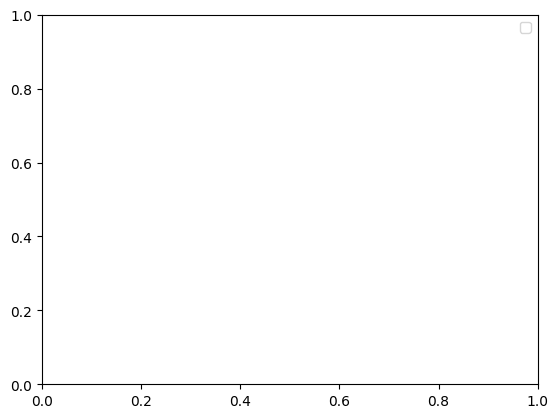

In [67]:
my_model = create_model(input_shape, learning_rate)

epochs, hist = train_model(my_model, train_features, train_labels, epochs, batch_size)

plt.plot(epochs, hist)

plt.legend()
plt.show()

In [381]:
# Filter Numeric Columns in test data
test_numeric_columns = df_test.select_dtypes(include=[np.number]).columns
test_features = df_test[test_numeric_columns]

#train_features = np.delete(train_features,1,1)
print (train_features)

# Calculate mean and standard deviation from training data
train_mean = train_features.mean(axis=0)
train_std = train_features.std(axis=0)

print(train_mean)

# Normalize the numeric features in the test data using the mean and standard deviation from training data
test_features = (test_features - train_mean) / train_std


# Make predictions on the normalized test data
predictions = my_model.predict(test_features)


print (predictions)
np.savetxt("prediction.csv", np.round(predictions), delimiter=",")

[[-1.73010796  0.82737724  0.43279337 -0.47367361 -0.50244517 -0.73769513]
 [-1.72622007 -1.56610693  0.43279337 -0.47367361  0.78684529  1.35557354]
 [-1.72233219  0.82737724 -0.4745452  -0.47367361 -0.48885426  1.35557354]
 ...
 [ 1.72233219  0.82737724  0.43279337  2.00893337 -0.17626324  1.35557354]
 [ 1.72622007 -1.56610693 -0.4745452  -0.47367361 -0.04438104 -0.73769513]
 [ 1.73010796  0.82737724 -0.4745452  -0.47367361 -0.49237783 -0.73769513]]
[ 6.37973276e-17 -8.77213254e-17  4.38606627e-17  5.38289951e-17
  3.98733297e-18  3.98733297e-17]
14/14 [==============================] - 0s 2ms/step
[[1.20035507e-37]
 [4.36516489e-37]
 [2.79743520e-35]
 [3.26260465e-37]
 [4.43129182e-34]
 [6.42359521e-37]
 [5.32185445e-37]
 [4.25885808e-23]
 [2.33397447e-37]
 [7.63998305e-27]
 [4.89548719e-38]
 [1.10520691e-23]
 [1.00000000e+00]
 [8.50626545e-25]
 [9.58066821e-01]
 [1.04735182e-22]
 [4.56777222e-34]
 [0.00000000e+00]
 [3.37190279e-37]
 [7.71179555e-38]
 [6.15814030e-02]
 [0.00000000e+